* ### Importing librabies

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from itertools import cycle
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

* ### Loading dataset

In [74]:
titanic_df = pd.read_csv('titanic.csv')

* ### Checking the first five rows of the dataframe using the head method

In [75]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


* ### Dropping some unnecessaries features

In [76]:
titanic_df.drop(['PassengerId','Ticket'], axis=1, inplace=True)
titanic_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


* ### Changing the index to name 

In [77]:
#titanic_df.set_index('Name', inplace=True)

In [78]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [79]:
titanic_df.groupby(['Sex']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [80]:
titanic_df.groupby(['Sex','Pclass']).mean()

Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                     
female 1       0.968085  34.611765  0.553191  0.457447  106.125798
       2       0.921053  28.722973  0.486842  0.605263   21.970121
       3       0.500000  21.750000  0.895833  0.798611   16.118810
male   1       0.368852  41.281386  0.311475  0.278689   67.226127
       2       0.157407  30.740707  0.342593  0.222222   19.741782
       3       0.135447  26.507589  0.498559  0.224784   12.661633

In [81]:
titanic_df[titanic_df['Age']<18].groupby(['Sex','Pclass']).mean()

Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                     
female 1       0.875000  14.125000  0.500000  0.875000  104.083337
       2       1.000000   8.333333  0.583333  1.083333   26.241667
       3       0.542857   8.428571  1.571429  1.057143   18.727977
male   1       1.000000   8.230000  0.500000  2.000000  116.072900
       2       0.818182   4.757273  0.727273  1.000000   25.659473
       3       0.232558   9.963256  2.069767  1.000000   22.752523

<AxesSubplot:>

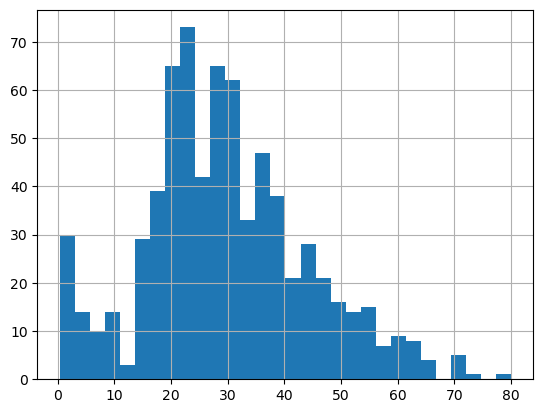

In [82]:
titanic_df['Age'].hist(bins=30)

In [83]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Count'>

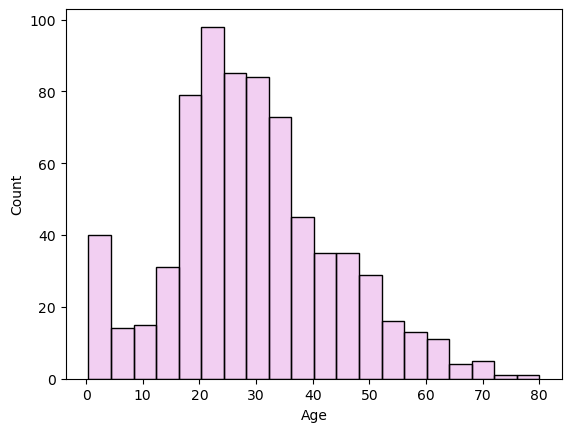

In [84]:
sns.histplot(x=titanic_df['Age'], color='m', alpha=0.19)

In [85]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
!pip install cufflinks

In [87]:
import cufflinks as cf

In [88]:
cf.go_offline()

In [89]:
titanic_df['Age'].iplot(kind='hist',bins=50)

In [90]:
import seaborn as sns

<AxesSubplot:>

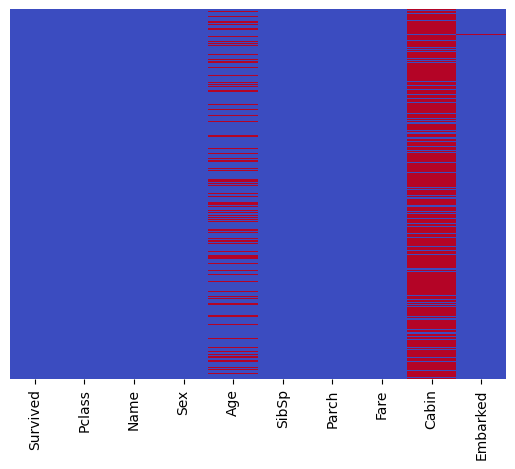

In [91]:
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [92]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [93]:
titanic_df['age'] = titanic_df[['Age','Pclass']].apply(impute_age, axis=1)

In [94]:
titanic_df.groupby(['Sex','Pclass']).mean()

Survived        Age     SibSp     Parch        Fare        age
Sex    Pclass                                                                
female 1       0.968085  34.611765  0.553191  0.457447  106.125798  34.840426
       2       0.921053  28.722973  0.486842  0.605263   21.970121  28.730263
       3       0.500000  21.750000  0.895833  0.798611   16.118810  22.406250
male   1       0.368852  41.281386  0.311475  0.278689   67.226127  40.544426
       2       0.157407  30.740707  0.342593  0.222222   19.741782  30.595648
       3       0.135447  26.507589  0.498559  0.224784   12.661633  25.828300

In [102]:
titanic_df['Survived'].value_counts().iplot(kind='bar')

In [98]:
titanic_df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

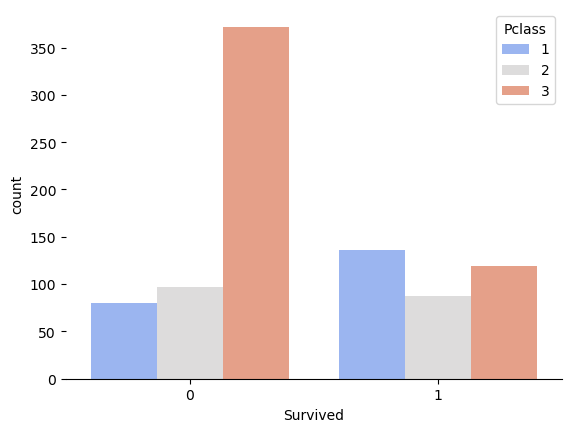

In [109]:
sns.countplot(x='Survived', hue='Pclass',palette='coolwarm', data=titanic_df)
sns.despine(left=True)

In [39]:
sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'],drop_first=True)

In [40]:
titanic_df = pd.concat([titanic_df,sex,embark],axis=1)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,22.0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,38.0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,26.0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,35.0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,35.0,1,0,1


In [41]:
titanic_df.drop(['Sex','Name','Embarked','Cabin'],axis=1,inplace=True)

In [42]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,age,male,Q,S
0,0,3,22.0,1,0,7.2500,22.0,1,0,1
1,1,1,38.0,1,0,71.2833,38.0,0,0,0
2,1,3,26.0,0,0,7.9250,26.0,0,0,1
3,1,1,35.0,1,0,53.1000,35.0,0,0,1
4,0,3,35.0,0,0,8.0500,35.0,1,0,1


In [43]:
titanic_df.drop('Age', axis=1,inplace=True)

In [44]:
titanic_df.head()

,Survived,Pclass,SibSp,Parch,Fare,age,male,Q,S
0,0,3,1,0,7.2500,22.0,1,0,1
1,1,1,1,0,71.2833,38.0,0,0,0
2,1,3,0,0,7.9250,26.0,0,0,1
3,1,1,1,0,53.1000,35.0,0,0,1
4,0,3,0,0,8.0500,35.0,1,0,1


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), 
                                                    titanic_df['Survived'], test_size=0.30, 
                                                    random_state=3)

In [47]:
from IPython.display import display

In [48]:
display(X_train.shape, y_train.shape)

(623, 8)

(623,)

In [49]:
display(X_test.shape, y_test.shape)

(268, 8)

(268,)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\doumb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [52]:
# Prediction
predictions = logmodel.predict(X_test)

# Evaluation

We can check precision,recall,f1-score using classification report!

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       164
           1       0.69      0.75      0.72       104

    accuracy                           0.77       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.77      0.77       268



In [65]:
print(confusion_matrix(y_test,predictions))

[[129  35]
 [ 26  78]]
